# Fraud Detection Dataset Project
## Tom Ritman-Meer using Google Colaboratory notebook

In this notebook I will deploy machine learning models to predict the probability of a credit card transaction being fraudulent based a number of PCA parameters. 

The project consists of the following steps:
* Retreiving the dataset from Kaggle.com
* Exploratory Data Analysis
* Feature Engineering of the data into a suitable form for models
* Building and comparing machine learning models


In [18]:
# Steps to download creditcard.csv from kaggle
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fad874a5150>,
      dtype=object)

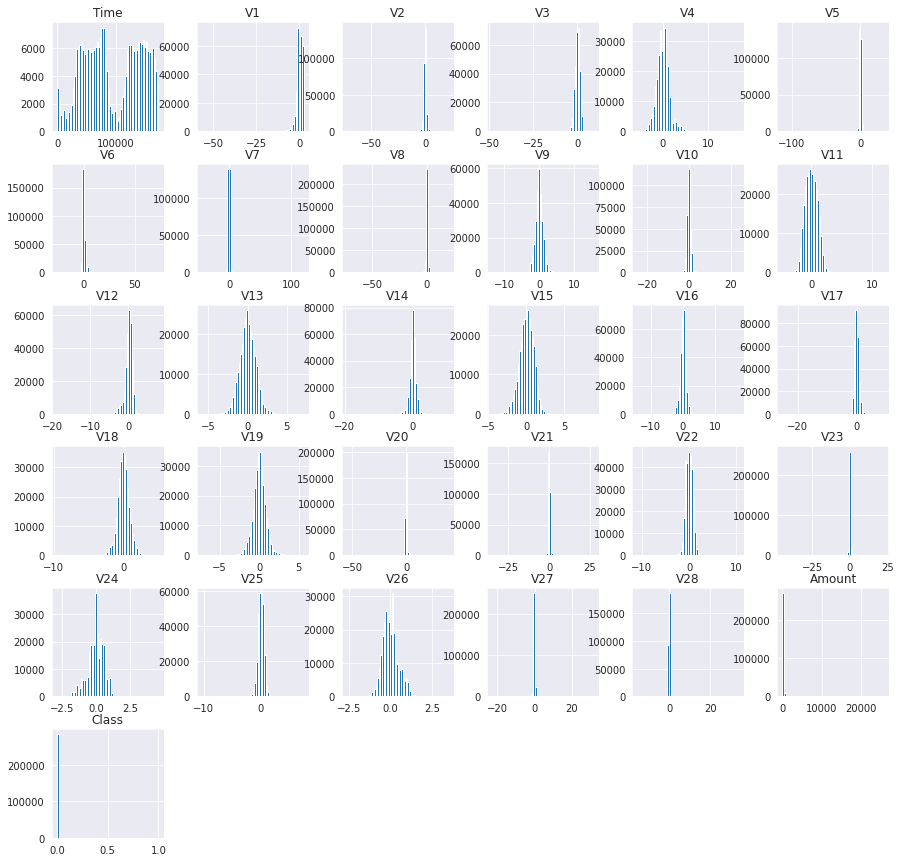

In [25]:
df.hist(figsize=(15,15), bins = 64)

In [22]:
df[df['Class']==0]['Time'].describe()

count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64

In [23]:
df[df['Class']==1]['Time'].describe()

count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

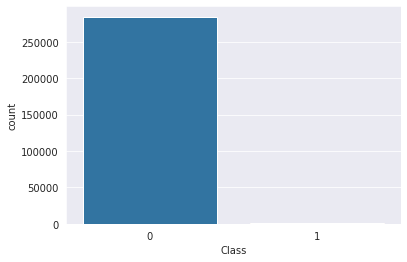

In [24]:
sns.set_style('darkgrid')
sns.countplot(x='Class',data=df)

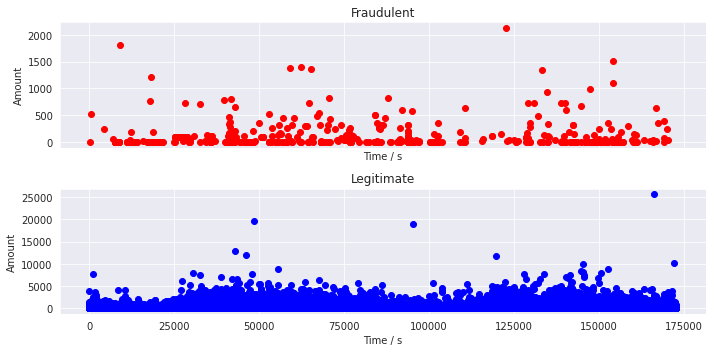

In [60]:
fraudulent = df[df['Class'] == 1]
legitimate = df[df['Class'] == 0]

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 5))

ax[0].scatter(fraudulent['Time'], fraudulent['Amount'], c='red')
ax[0].set_title('Fraudulent')
ax[0].set_xlabel('Time / s')
ax[0].set_ylabel('Amount')
ax[1].scatter(legitimate['Time'], legitimate['Amount'],c='blue')
ax[1].set_title('Legitimate')
ax[1].set_xlabel('Time / s')
ax[1].set_ylabel('Amount')
plt.tight_layout()

In [59]:
df.groupby('Class')['Class'].count()

Class
0    284315
1       492
Name: Class, dtype: int64

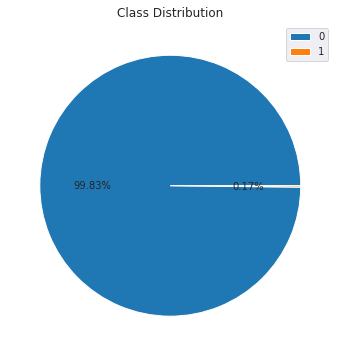

In [48]:
plt.figure(figsize=(6,6))

#explode = [0,0.001]
plt.pie(df['Class'].value_counts(),autopct='%1.2f%%')
plt.legend(labels=['0','1'])
plt.title('Class Distribution');

#Data is highly unbalanced.

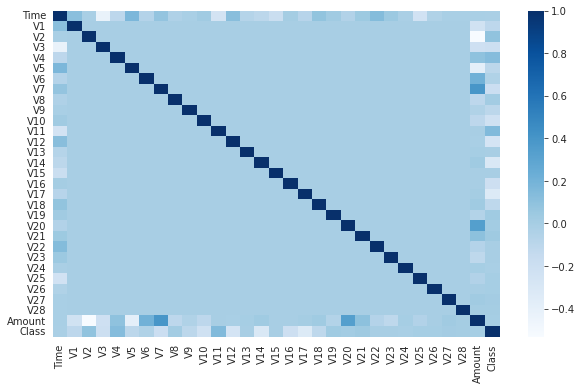

In [57]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='Blues')

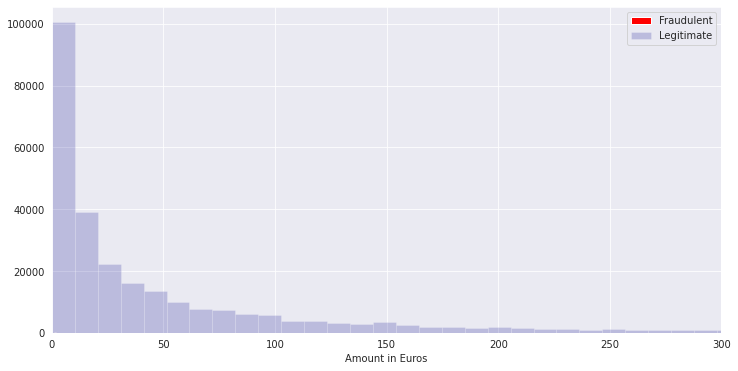

In [58]:
plt.figure(figsize=(12,6))

df[df['Class']==1]['Amount'].hist(alpha=1,color='red', bins=2500,label='Fraudulent')
df[df['Class']==0]['Amount'].hist(alpha=0.2,color='darkblue', bins=2500,label='Legitimate')

plt.legend()
plt.xlabel('Amount in Euros')
plt.xlim(0,300)
sns.histplot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Fraudulent Transactions')

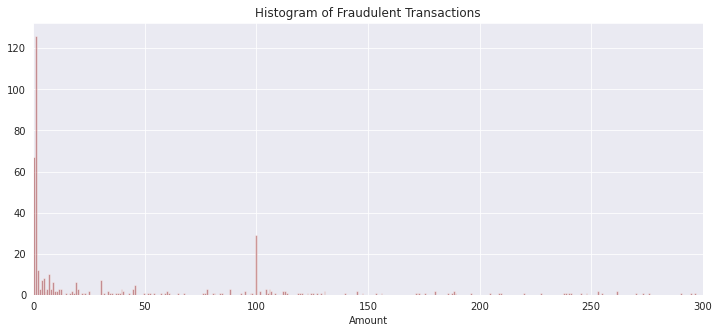

In [61]:
plt.figure(figsize=(12,5))
sns.distplot(df[df['Class']==1]['Amount'],kde=False,bins=2500,color='darkred')
plt.xlim(0,300)
plt.title('Histogram of Fraudulent Transactions')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Legitimate Transactions')

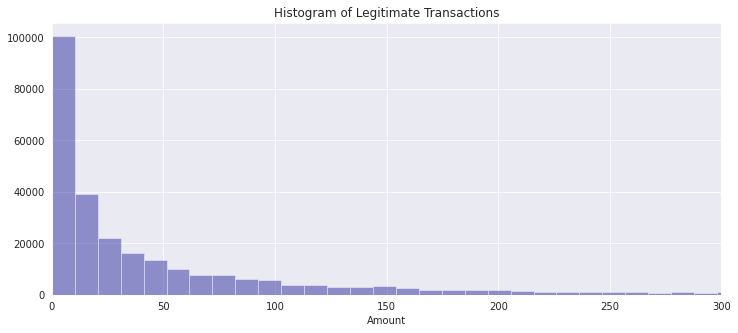

In [62]:
plt.figure(figsize=(12,5))
sns.distplot(df[df['Class']==0]['Amount'],kde=False,bins=2500,color='darkblue')
plt.xlim(0,300)
plt.title('Histogram of Legitimate Transactions')

(0.0, 280.0)

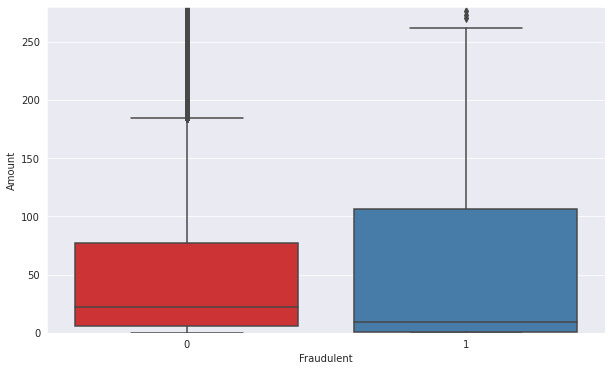

In [66]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Class',y='Amount',data=df,palette='Set1')
plt.xlabel('Fraudulent')
plt.ylim(0,280)

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X = df.drop('Class',axis=1)
y = df['Class']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [70]:
#data needs to be scaled to give accurate parameter weighting for machine learning models
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

First try logistic regression classifier model

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [73]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56871
           1       0.87      0.60      0.71        91

    accuracy                           1.00     56962
   macro avg       0.94      0.80      0.86     56962
weighted avg       1.00      1.00      1.00     56962

[[56863     8]
 [   36    55]]


36 of 91 fraudulent transactions were wrongly classified. This is not a great result, let's try a different model.

Try K Nearest Neighbours classifier with n = 1

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [76]:
pred = knn.predict(X_test)

In [77]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56871
           1       0.88      0.81      0.85        91

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

[[56861    10]
 [   17    74]]


The KNN model reduces the number of wrongly classified fraudulent transactions to 17/91, which is a much better result. Only 10 out of 56,871 legitimate transactions are wrongly categorised as fraudulent.

Try a random forest classifier with 100 iterations

In [78]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

In [79]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [80]:
predictions = rfc.predict(X_test)

In [81]:
print('Classification Report \n')
print(classification_report(y_test,predictions))
print('\n Confusion Matrix \n')
print(confusion_matrix(y_test,predictions))

Classification Report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56871
           1       0.92      0.79      0.85        91

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962


 Confusion Matrix 

[[56865     6]
 [   19    72]]


Random forest classifier reduces the number of false positives to 6 but performs slightly worse than the KNN algorishm on the fraudulent transactions, falsly labelling 19 out 91 transactions as legitimate.

Import TensorFlow and implement an artificial neural network.

In [82]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [83]:
X_train.shape

(227845, 30)

X has 30 inputs, so we we will use 30 units in the first layer of the network.

In [84]:
model = Sequential()
#define number of model layers and number of neurons in each layer
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=20,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=20,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=10,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=5,activation='relu'))
model.add(Dropout(0.1))
# This is a binary classification problem, so we require a sigmoid activation function
model.add(Dense(units=1,activation='sigmoid'))
# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [85]:
model.fit(x=X_train,y=y_train,epochs=50,batch_size=256,validation_data=(X_test, y_test))

Epoch 1/50
891/891 [==============================] - 4s 3ms/step - loss: 0.0423 - val_loss: 0.0051
Epoch 2/50
891/891 [==============================] - 3s 3ms/step - loss: 0.0074 - val_loss: 0.0036
Epoch 3/50
891/891 [==============================] - 3s 3ms/step - loss: 0.0060 - val_loss: 0.0035
Epoch 4/50
891/891 [==============================] - 3s 3ms/step - loss: 0.0056 - val_loss: 0.0045
Epoch 5/50
891/891 [==============================] - 3s 3ms/step - loss: 0.0054 - val_loss: 0.0033
Epoch 6/50
891/891 [==============================] - 3s 3ms/step - loss: 0.0055 - val_loss: 0.0039
Epoch 7/50
891/891 [==============================] - 3s 3ms/step - loss: 0.0054 - val_loss: 0.0037
Epoch 8/50
891/891 [==============================] - 3s 3ms/step - loss: 0.0051 - val_loss: 0.0046
Epoch 9/50
891/891 [==============================] - 3s 3ms/step - loss: 0.0051 - val_loss: 0.0038
Epoch 10/50
891/891 [==============================] - 3s 3ms/step - loss: 0.0052 - val_loss: 0.0037

In [86]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,val_loss
0,0.042290,0.005144
1,0.007351,0.003570
2,0.005984,0.003489
3,0.005623,0.004497
4,0.005439,0.003320


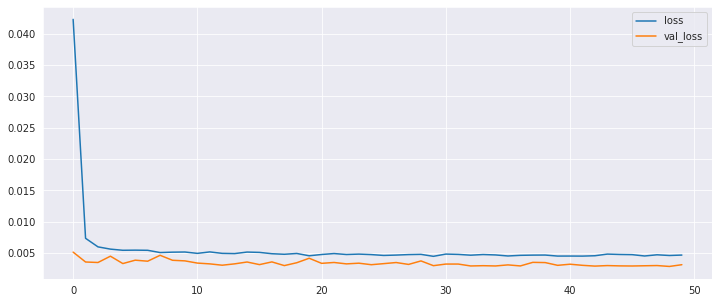

In [87]:
model_loss.plot(figsize=(12,5))

In [88]:
from sklearn.metrics import classification_report,confusion_matrix
#predictions = model.predict_classes(X_test)
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [90]:
print("Classification Report \n\n", classification_report(y_test,predictions))
print("Confusion Matrix \n\n", confusion_matrix(y_test,predictions))

Classification Report 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56871
           1       0.85      0.78      0.81        91

    accuracy                           1.00     56962
   macro avg       0.92      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix 

 [[56858    13]
 [   20    71]]


In [92]:
import random
random.seed(3)
random_ind = random.randint(0,len(df))

test_transaction = df.drop('Class',axis=1).iloc[random_ind]
test_transaction

Time      77415.000000
V1           -0.731833
V2            0.631244
V3            1.352622
V4           -0.250513
V5            0.829905
V6            1.425032
V7            0.359005
V8            0.682196
V9           -0.721615
V10          -0.777572
V11           2.199711
V12           0.303323
V13          -1.226696
V14           0.191112
V15           1.398352
V16          -0.659118
V17           1.042950
V18          -1.396318
V19          -1.257195
V20          -0.130662
V21          -0.013267
V22          -0.095202
V23           0.154927
V24          -1.098428
V25          -0.691598
V26           0.160788
V27           0.122187
V28           0.106039
Amount       34.990000
Name: 124761, dtype: float64

In [94]:
model.predict(test_transaction.values.reshape(1,30))

array([[0.]], dtype=float32)

In [95]:
df['Class'].iloc[random_ind]

0

The neural network is less accurate in its predictions than the KNN and random forest models. This is likely because neural networks tend to perform better on tasks with very large data sets and many input parameters, such as image analysis or voice recognition. The model with the best overall prediction is the KNN classifier, which only classified 17 out of 91 fraudulent transactions incorrectly and only classified 10 legitimate transactions out of 56,871 as wrongly fraudulent.

Further work on this project could involve developing the KNN classifier for a larger number of nearest neighbour, though this is quite computationally expensive given the very large number of examples in this data set. Alternatively the neural network could be developed in order to optimise performance, to see if this approach could challenge the KNN and random forest models in predictive accuracy.